# Visualizations

In this notebook, we'll create visualizations that provide the reader with insight into the data that was analyzed in the previous notebooks

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns
import math


pd.set_option('display.max_columns', None)

In [2]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
df=df[df["STAT_CAUSE_DESCR"]!='Miscellaneous']

In [4]:
df['STAT_CAUSE_DESCR'] = np.where(df['STAT_CAUSE_DESCR'] == 'Children', 'Negligence',df['STAT_CAUSE_DESCR'])

In [5]:
df['STAT_CAUSE_DESCR'] = np.where(df['STAT_CAUSE_DESCR'] == 'Equipment Use','Infrastructure', df['STAT_CAUSE_DESCR'])


In [6]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

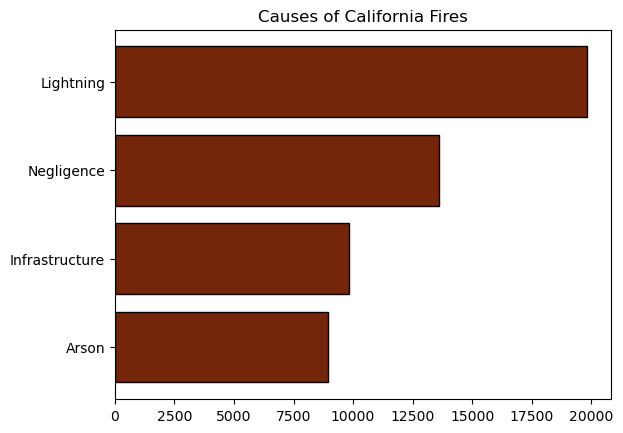

In [7]:
categories = df['STAT_CAUSE_DESCR'].value_counts().index
counts = df['STAT_CAUSE_DESCR'].value_counts().values
plt.title('Causes of California Fires')
fig=plt.barh(categories, counts, color='#73260A', edgecolor='black')
plt.gca().invert_yaxis()
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"
plt.show()

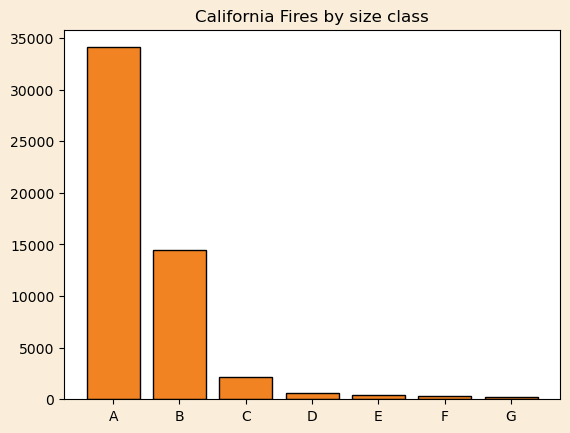

''

In [8]:
categories = df['FIRE_SIZE_CLASS'].value_counts().index
counts = df['FIRE_SIZE_CLASS'].value_counts().values
plt.title('California Fires by size class')
plt.bar(categories, counts, color='#F28322', edgecolor='black')
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.show()
;

In [9]:
df.head()

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0
5,182,Lightning,CA,FED,1.0,A,38.635278,-120.103611,Eldorado National Forest,2004,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0


/Users/ryan/miniconda3/envs/tf/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


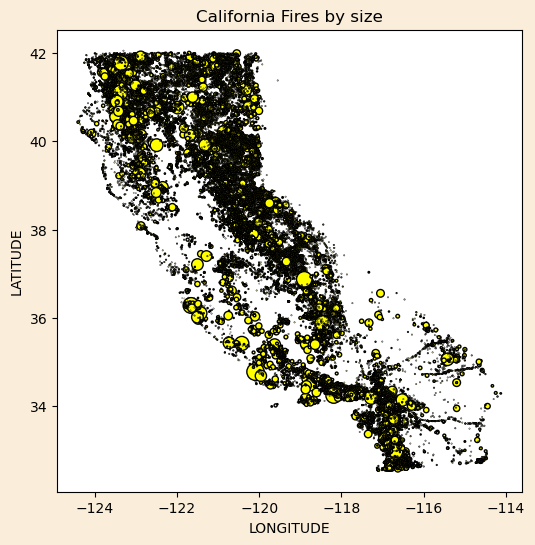

In [10]:
df.plot(kind='scatter',
       x='LONGITUDE',
        y='LATITUDE',
        c='yellow',
        cmap='BrBG',
        edgecolors='black',
        figsize=(6,6),
        s= (.1*df['FIRE_SIZE'])**.5
        
       )
plt.title('California Fires by size')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

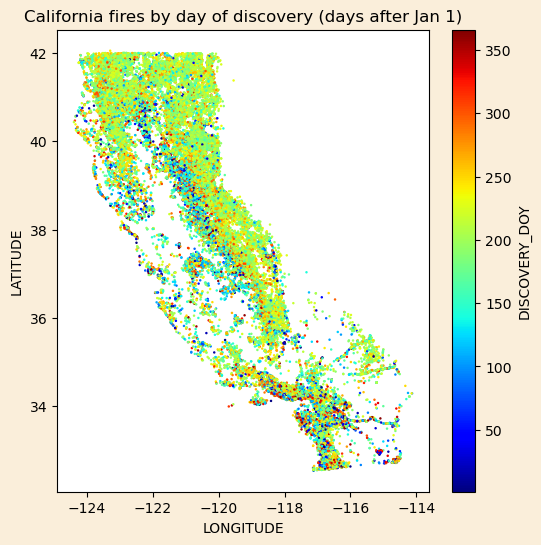

In [11]:
df.plot(kind='scatter',
       x='LONGITUDE',
        y='LATITUDE',
        c='DISCOVERY_DOY',
        cmap='jet',
        figsize=(6,6),
        s= .6
       )
plt.title('California fires by day of discovery (days after Jan 1)')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

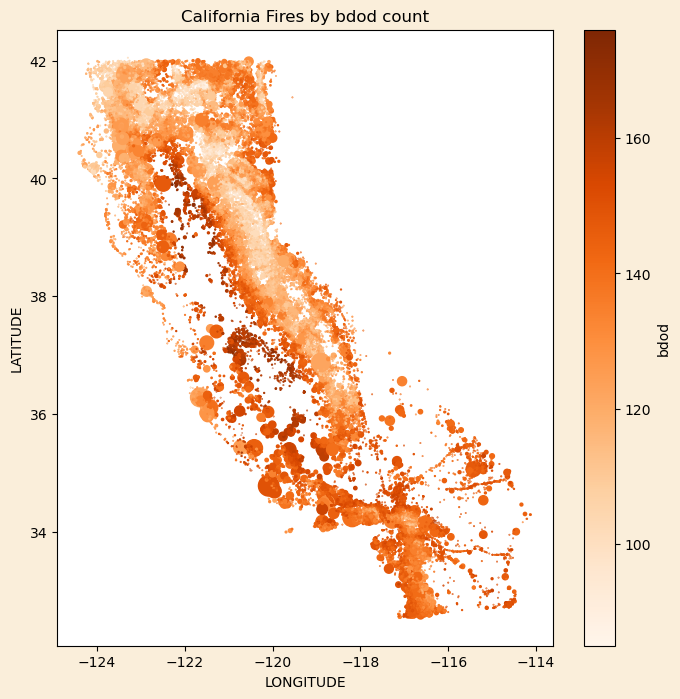

In [12]:
df.plot(kind='scatter',
       x='LONGITUDE',
        y='LATITUDE',
        c='bdod',
        cmap='Oranges',
        figsize=(8,8),
        s=(.2*df['FIRE_SIZE'])**.5
       )
plt.title('California Fires by bdod count')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

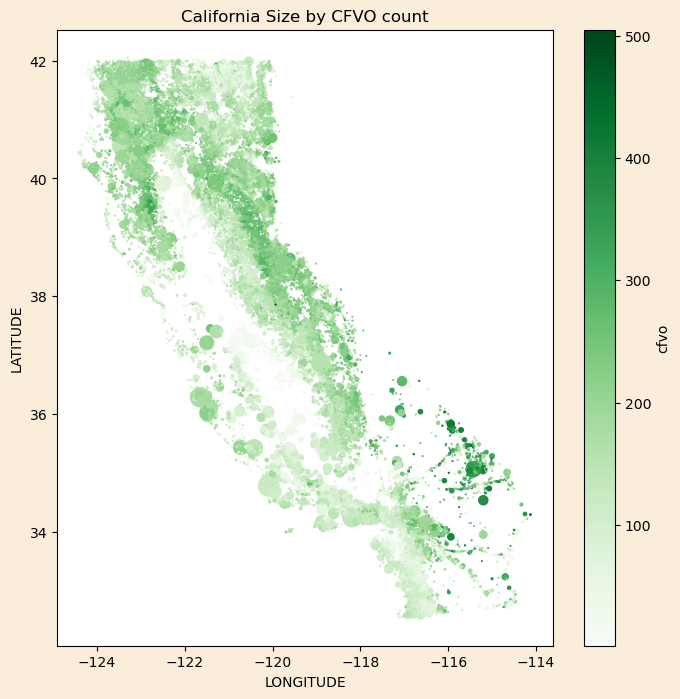

In [13]:
df.plot(kind='scatter',
       x='LONGITUDE',
        y='LATITUDE',
        c='cfvo',
        cmap='Greens',
        figsize=(8,8),
        s=(.2*df['FIRE_SIZE'])**.5
       )
plt.title('California Size by CFVO count')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [14]:
df['month']=df['DISCOVERY_DOY']//31+1

In [15]:
df.head()

,DISCOVERY_DOY,STAT_CAUSE_DESCR,STATE,SOURCE_SYSTEM_TYPE,duration,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,elevation,bdod,cec,cfvo,clay,nitrogen,phh2o,sand,silt,soc,month
1,133,Lightning,CA,FED,0.0,A,38.933056,-120.404444,Eldorado National Forest,2004,0.25,1842,102.0,335.0,246.0,140.0,466.0,58.0,550.0,309.0,741.0,5
2,152,Negligence,CA,FED,0.0,A,38.984167,-120.735556,Eldorado National Forest,2004,0.10,1067,119.0,213.0,137.0,244.0,343.0,58.0,331.0,425.0,573.0,5
3,180,Lightning,CA,FED,5.0,A,38.559167,-119.913333,Eldorado National Forest,2004,0.10,2365,110.0,129.0,216.0,66.0,201.0,55.0,755.0,179.0,458.0,6
4,180,Lightning,CA,FED,5.0,A,38.559167,-119.933056,Eldorado National Forest,2004,0.10,2316,118.0,137.0,212.0,68.0,156.0,55.0,740.0,192.0,410.0,6
5,182,Lightning,CA,FED,1.0,A,38.635278,-120.103611,Eldorado National Forest,2004,0.10,2541,108.0,204.0,230.0,66.0,283.0,55.0,697.0,237.0,509.0,6


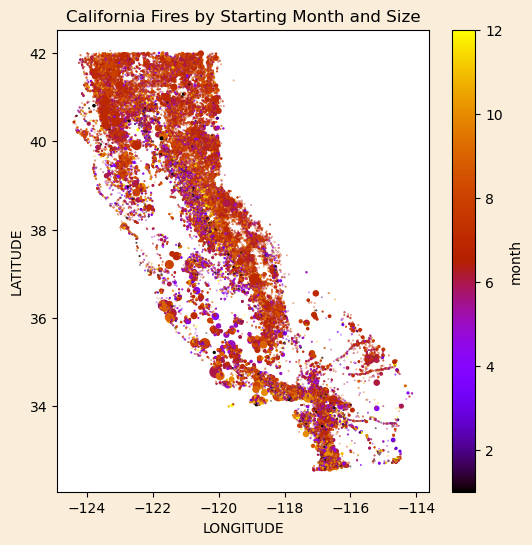

In [16]:
df.plot(kind='scatter',
       x='LONGITUDE',
        y='LATITUDE',
        c='month',
        cmap='gnuplot',
        figsize=(6,6),
        s=(.02*df['FIRE_SIZE'])**.5
       )
plt.title('California Fires by Starting Month and Size')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

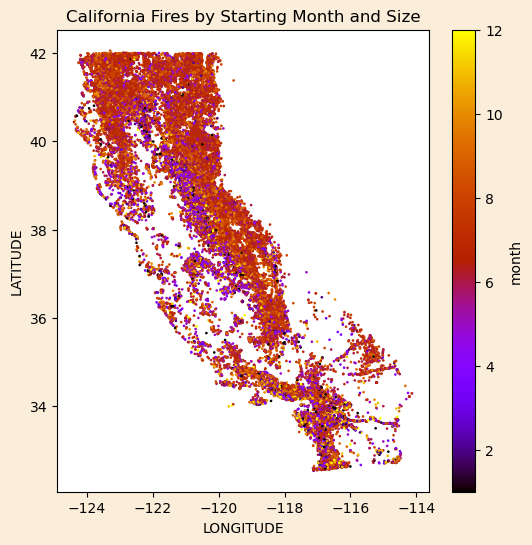

In [17]:
df.plot(kind='scatter',
       x='LONGITUDE',
        y='LATITUDE',
        c='month',
        cmap='gnuplot',
        figsize=(6,6),
        s=.8
       )
plt.title('California Fires by Starting Month and Size')
plt.rcParams['axes.facecolor'] = 'white'

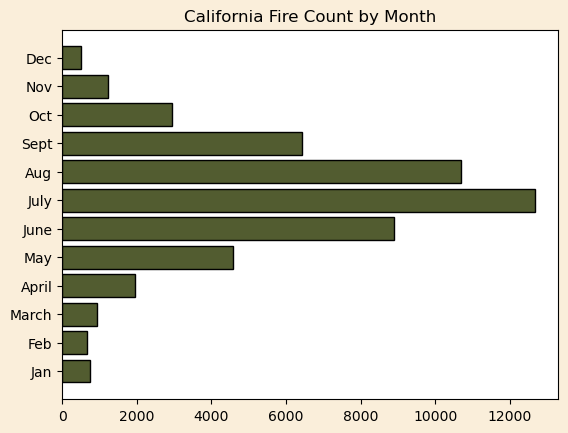

In [18]:
categories = df['month'].value_counts().index
counts = df['month'].value_counts().values
plt.title('California Fire Count by Month')
fig=plt.barh(categories, counts, color='#525C30', edgecolor='black')
# plt.gca().invert_yaxis()
plt.yticks([1, 2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'March' , 'April', 'May', 'June',
                                         'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.show();